In [1]:
import numpy as np #A library for working with arrays of numerical data.
import pandas as pd #data manipulation and analysis, including reading and writing data, filtering, sorting, grouping, and joining.
import matplotlib.pyplot as plt #creating static, animated, and interactive visualizations.
import seaborn as sns #creating statistical graphics based on Matplotlib
from sklearn import datasets, linear_model, model_selection, metrics # for machine learning, including classification, regression, clustering, and dimensionality reduction.
import tensorflow as tf # machine learning and deep learning, including building and training neural networks.
from tensorflow import keras #A high-level API for building and training neural networks, built on top of TensorFlow.

In [2]:
df=pd.read_csv("mcdonalds.csv")

In [3]:
df.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
cols_to_convert = ["yummy", "convenient", "spicy", "fattening", "greasy",
                   "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]

# Convert the columns to binary form
df[cols_to_convert] = df[cols_to_convert].replace({"Yes": 1, "No": 0})
df["Gender"] = df["Gender"].replace({"Male": 1, "Female": 0})
# Display the first few rows of the data frame to check the conversion
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,1


In [5]:
df.shape

(1453, 15)

In [6]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [7]:
#Checking for the count of below variables
df['Gender'].value_counts()
df['VisitFrequency'].value_counts()
df['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [8]:
df['VisitFrequency'].value_counts()


Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [9]:
df['VisitFrequency'].unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

### EXPLORING DATA

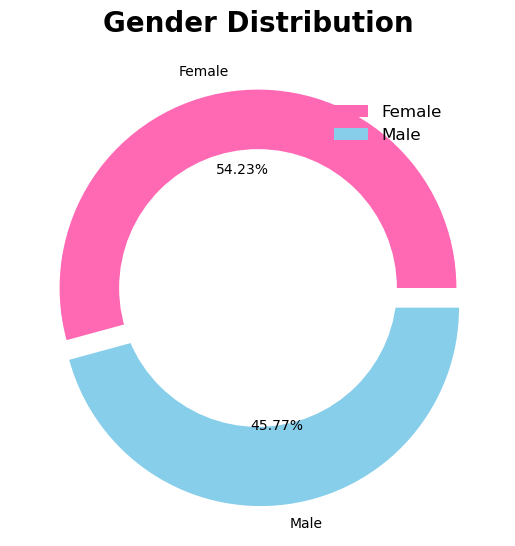

In [10]:
#EXPLORING DATA
size = df['Gender'].value_counts()
explode = [0, 0.1]
labels = ['Female', 'Male']
#Customer segmentation - based on socio-demographs (Age & Gender)

# Set custom colors for the pie chart
colors = ['#FF69B4', '#87CEEB']

# Set custom font sizes for the title and labels
title_font = {'fontsize': 20, 'fontweight': 'bold'}
label_font = {'fontsize': 12}

# Create the pie chart
plt.pie(size, colors=colors, explode=explode, labels=labels, autopct='%.2f%%')

# Add a title and adjust the position
plt.title('Gender Distribution', fontdict=title_font)
plt.subplots_adjust(top=1.2)

# Add a shadow effect to the chart
plt.gca().set_aspect('equal')
plt.gca().set_facecolor('white')
plt.gca().add_artist(plt.Circle((0,0),0.7,fc='white'))
plt.rcParams['text.color'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.gca().set_axisbelow(True)

# Add a legend with custom labels and adjust the position
legend_labels = ['Female', 'Male']
plt.legend(labels=legend_labels, loc='upper right', bbox_to_anchor=(0.9, 0.9), frameon=False, prop={'size': 12})

# Display the chart
plt.show()

#we infer that there are more female customers than male.

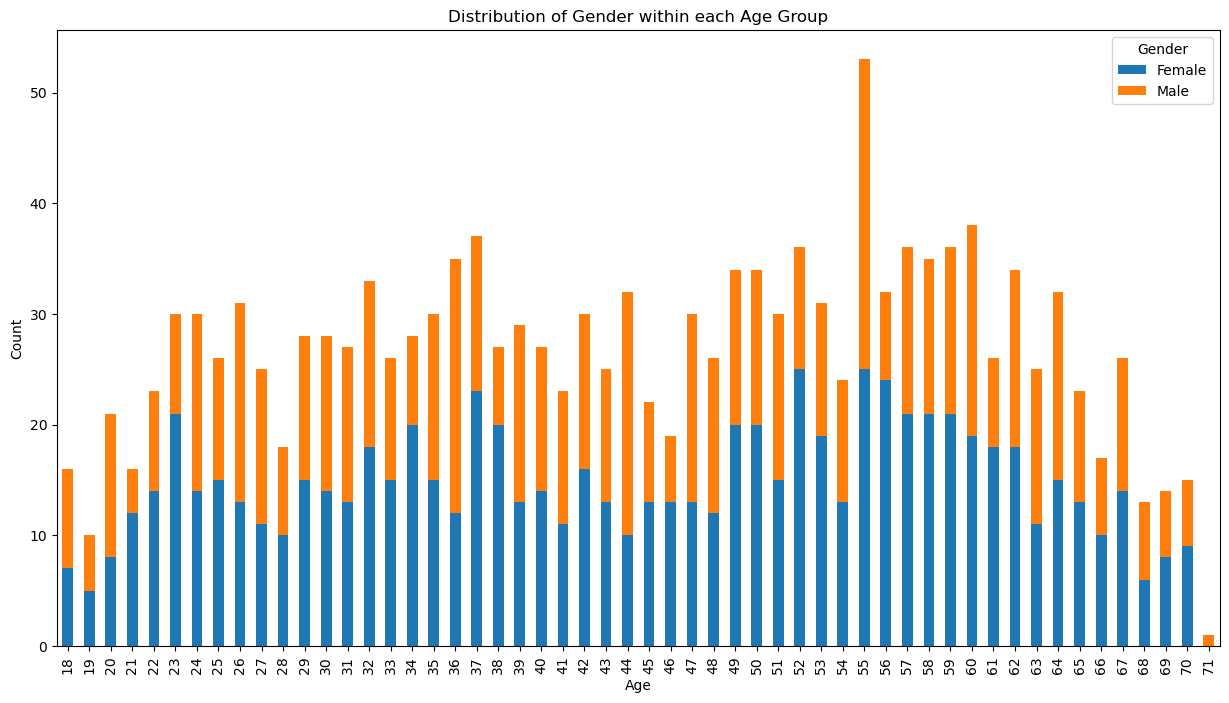

In [11]:

# Group the data by Age and Gender
age_gender = df.groupby(['Age', 'Gender']).size().reset_index(name='Count')

# Pivot the data to create a matrix of Age vs Gender counts
age_gender_pivot = age_gender.pivot(index='Age', columns='Gender', values='Count').fillna(0)

# Create a stacked bar chart
ax = age_gender_pivot.plot(kind='bar', stacked=True, figsize=(15,8))

# Add axis labels and a title
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Distribution of Gender within each Age Group')

# Add a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Female', 'Male'], title='Gender')
plt.show()

# Mcdonalds recieve more customers of age between 50-60 and 35-40.

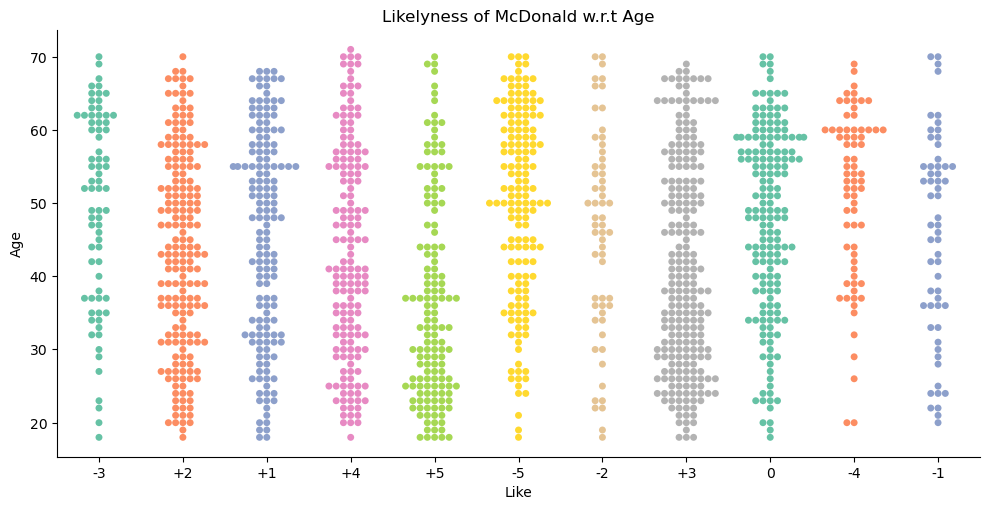

In [12]:
#Customer segmentation - based on pyschographic segmentation

#For convinence renaming the category
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
#Like 
sns.catplot(x="Like", y="Age",data=df, 
            orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

In [15]:
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,1
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,0
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,0
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,1


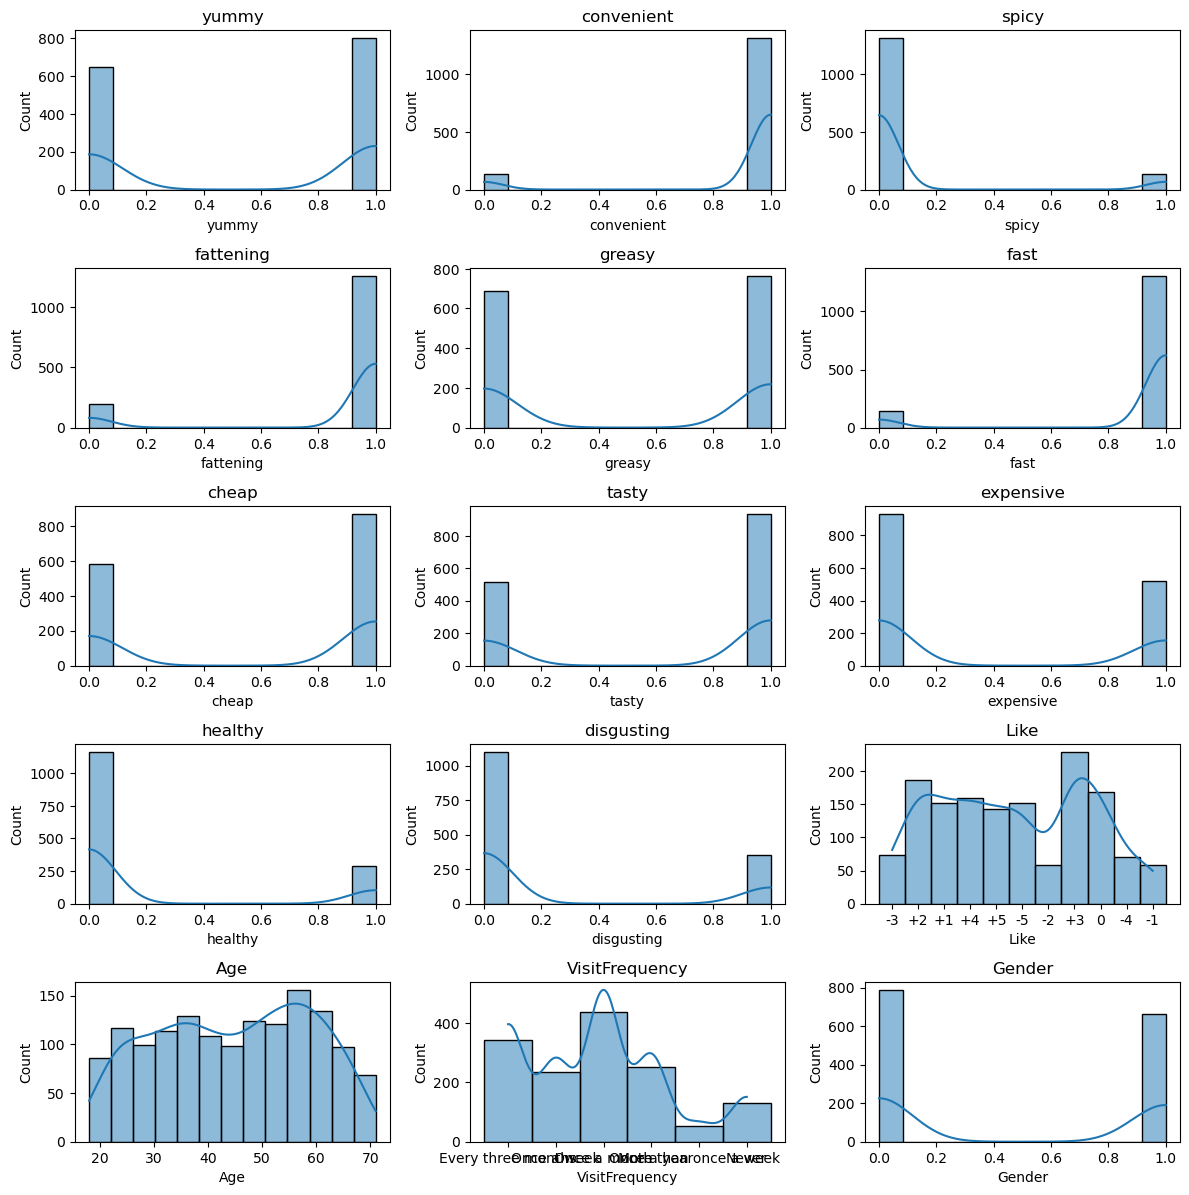

In [17]:
import seaborn as sns

plt.figure(figsize=(12,14))
for i, col in enumerate(df.columns):
    plt.subplot(6, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [18]:
#Considering only first 11 attributes
df_eleven = df.loc[:,cat]
df_eleven

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [19]:
#Considering only the 11 cols and converting it into array
x = df.loc[:,cat].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]], dtype=int64)

In [20]:
#Principal component analysis

from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [21]:
#Proportion of Variance (from PC1 to PC11)
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [22]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [23]:
# correlation coefficient between original variables and the component

loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_eleven.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


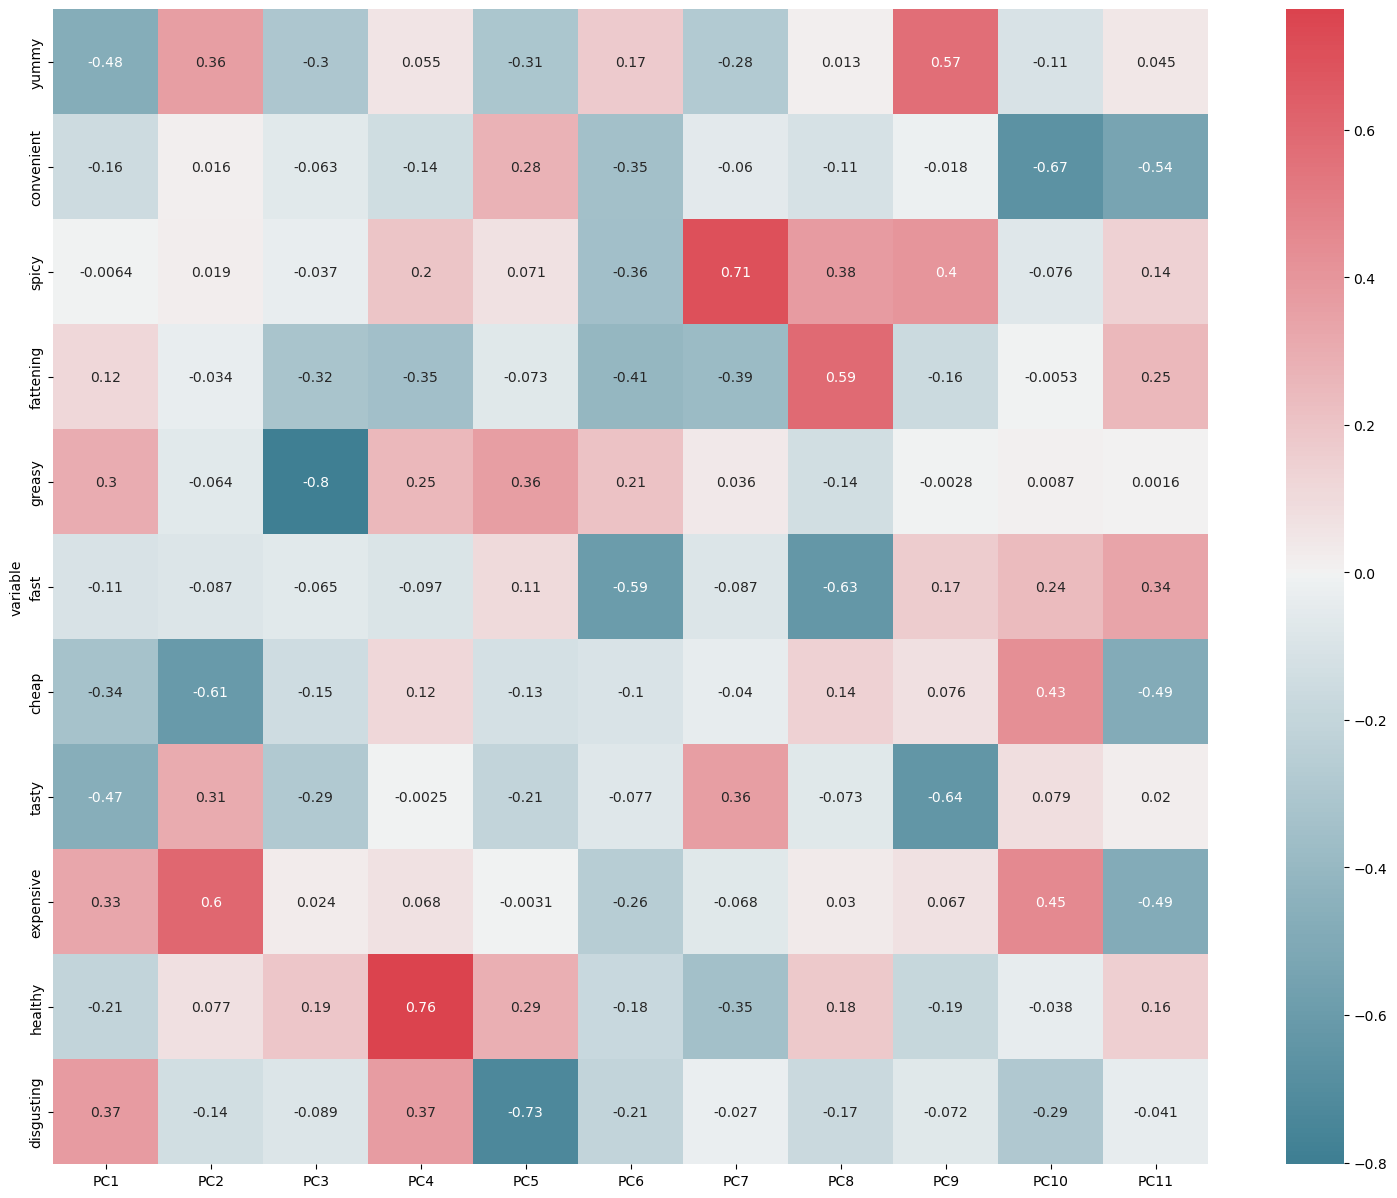

In [26]:
#Correlation matrix plot for loadings 

# Set color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plot correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(loadings_df, cmap=cmap, center=0, annot=True, square=True)
plt.show()

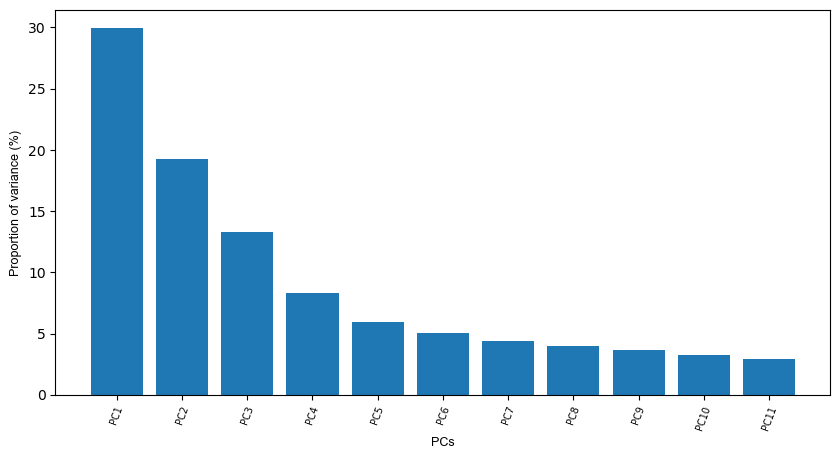

In [28]:
#Scree plot (Elbow test)- PCA

from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

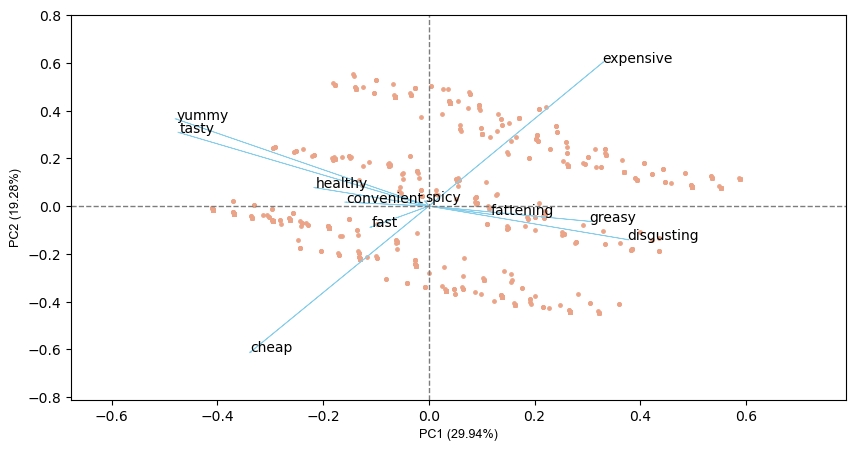

In [29]:
# get PC scores
pca_scores = PCA().fit_transform(x)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

### EXTRACTING SEGMENTS

C:\Users\Mohammed Ammaruddin\condaa\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


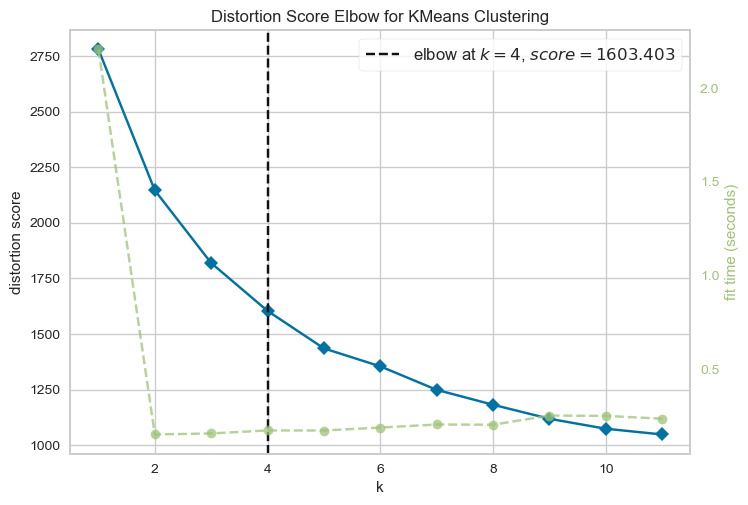

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
#Extracting segments

#Using k-means clustering analysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df_eleven)
visualizer.show()

In [32]:
#K-means clustering 

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster. 

[2 0 0 ... 0 1 3]
1603.0604440558916
7
[[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


In [33]:
#To see each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 304, 0: 323, 1: 580, 3: 246})

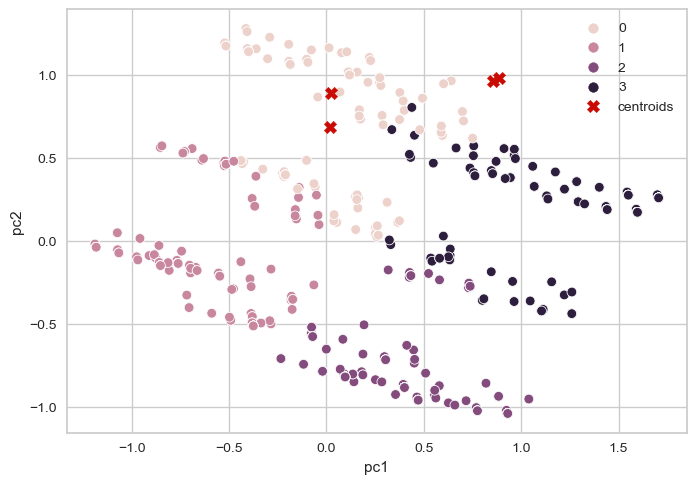

In [34]:
#Visulazing clusters
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

### DESCRIBING SEGMENTS

In [35]:
#DESCRIBING SEGMENTS

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df['cluster_num'],df['Like'])
#Reordering cols
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab 

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,5,3,7,6,7,36,42,60,66,47,44
1,4,4,2,6,13,43,65,90,143,111,99
2,54,36,34,28,25,51,31,31,12,2,0
3,89,28,30,19,13,39,14,6,8,0,0


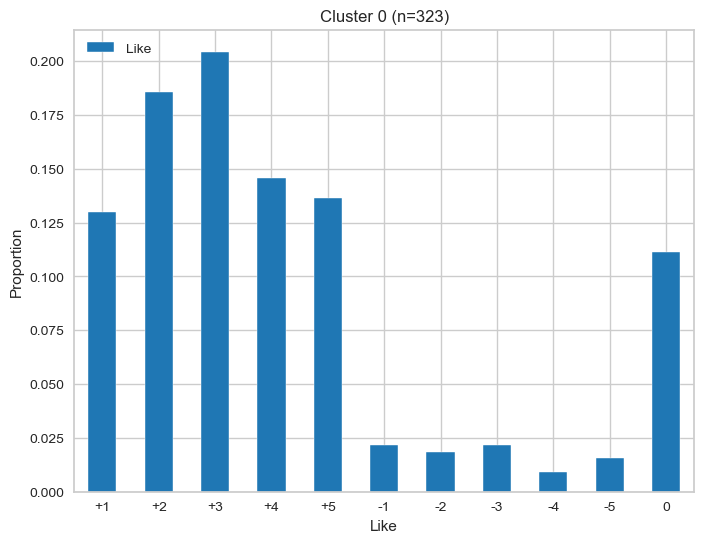

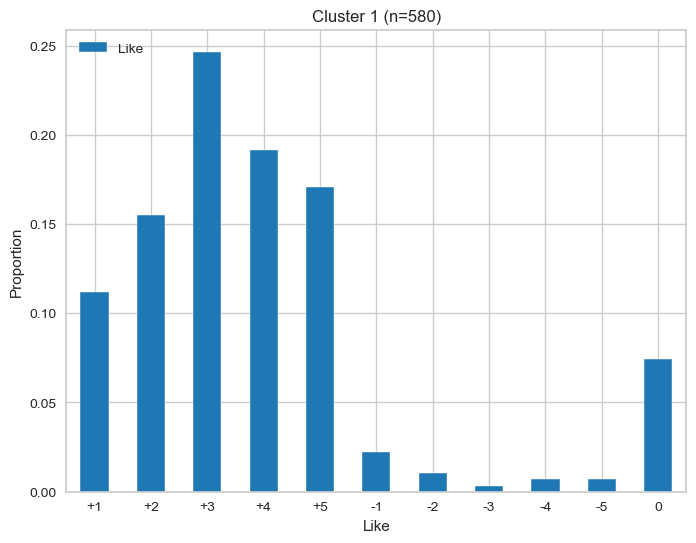

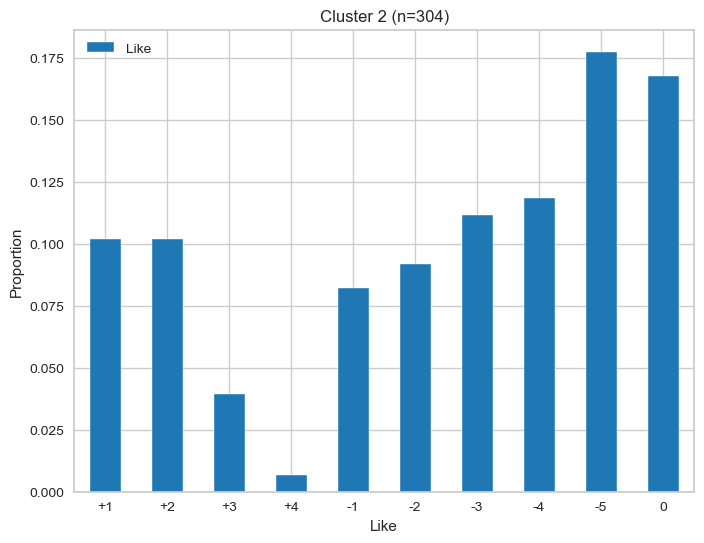

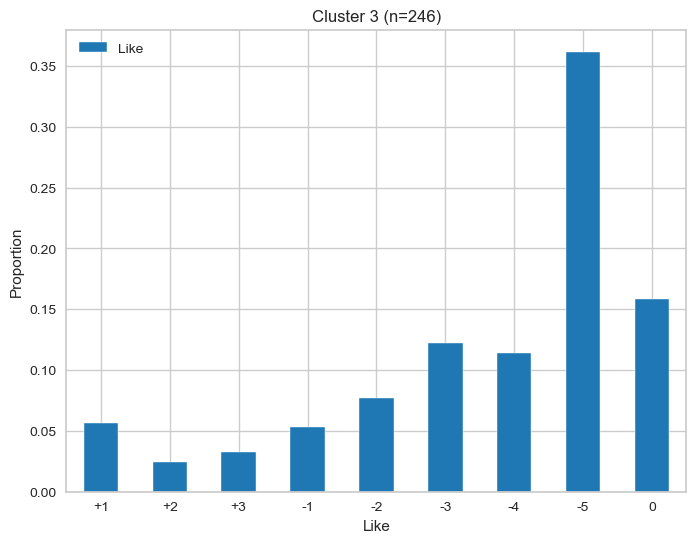

In [36]:
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('tab10')

# create stacked bar charts for each cluster
for i in range(df['cluster_num'].nunique()):
    cluster = df[df['cluster_num'] == i]
    like_counts = cluster['Like'].value_counts(normalize=True).sort_index()
    like_counts.plot(kind='bar', stacked=True, figsize=(8,6))
    plt.xticks(rotation=0)
    plt.xlabel('Like')
    plt.ylabel('Proportion')
    plt.title(f'Cluster {i} (n={len(cluster)})')
    plt.legend(loc='upper left')
    plt.show()


In [37]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

Gender,0,1
cluster_num,,
0,154,169
1,349,231
2,179,125
3,106,140


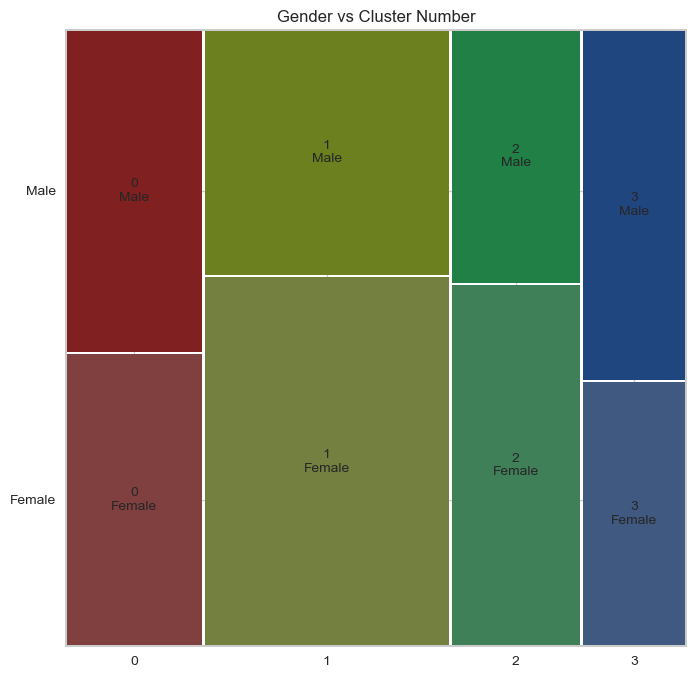

In [38]:
from statsmodels.graphics.mosaicplot import mosaic

# reorder columns for better display
#Mosaic plot gender vs segment
crosstab_gender = pd.crosstab(df['cluster_num'], df['Gender'].replace({1: 'Male', 0: 'Female'}))
# crosstab_gender


# create mosaic plot
fig, ax = plt.subplots(figsize=(8, 8))
mosaic(crosstab_gender.stack(), ax=ax, title='Gender vs Cluster Number')
plt.show()


Text(0.5, 1.0, 'Distribution of Age by Cluster Number')

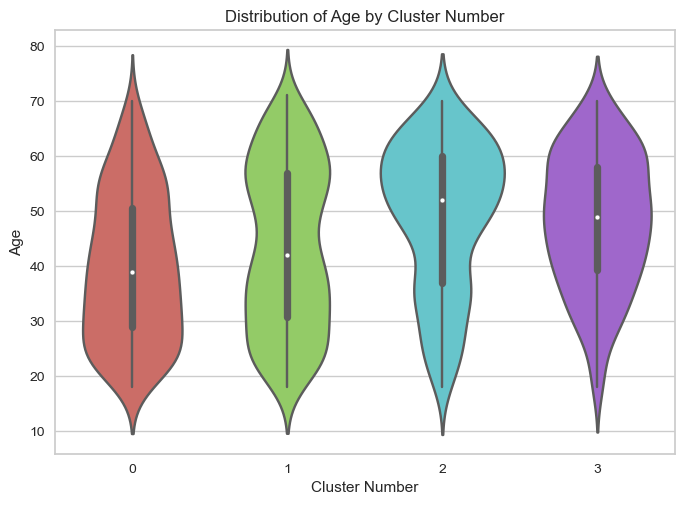

In [39]:
# create a color palette based on the number of clusters
color_palette = sns.color_palette("hls", len(df['cluster_num'].unique()))

# create a violinplot of age by cluster
sns.violinplot(x="cluster_num", y="Age", data=df, palette=color_palette)

# add labels and title
plt.xlabel("Cluster Number")
plt.ylabel("Age")
plt.title("Distribution of Age by Cluster Number")


### Selecting target segment

In [41]:
#Calculating the mean
#Visit frequency
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [42]:
#Like
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.275542
1,1,2.962069
2,2,6.171053
3,3,7.422764


In [43]:
#Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


In [44]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.523220,3.275542,2.547988
1,1,0.398276,2.962069,2.584483
2,2,0.411184,6.171053,2.822368
3,3,0.569106,7.422764,2.654472


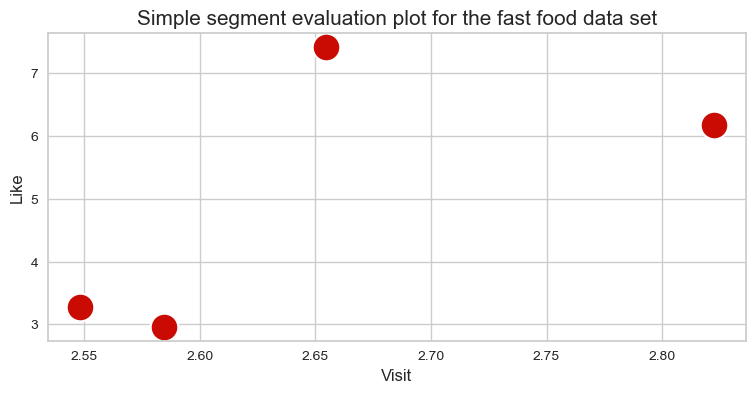

In [45]:
#Target segments

plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()

## Conclusion

#### This is a scatterplot showing the relationship between the two variables "VisitFrequency" and "Like" for the segment data. Each point in the plot represents a data point in the segment dataset. The x-axis represents the "VisitFrequency" variable, which indicates how often a person visits a fast food restaurant. The y-axis represents the "Like" variable, which indicates how much a person likes fast food.

#### The plot shows that there are four distinct groups or clusters of data points. The group on the bottom left represents people who visit fast food restaurants less frequently and have a low liking for fast food. The group on the bottom right represents people who visit fast food restaurants more frequently but still have a low liking for fast food. The group on the top left represents people who visit fast food restaurants less frequently but have a high liking for fast food. The group on the top right represents people who visit fast food restaurants more frequently and have a high liking for fast food.

#### The plot helps to identify the target segments for the fast food industry. The target segments would be the group on the top right, as they visit fast food restaurants frequently and have a high liking for fast food. The industry could focus on targeting this group with their marketing and promotions to increase sales and profitability.